# Esercitazione 4

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
color_palette = sns.color_palette("bright")

## Esercizio 4.01
L'esercizio 4.1 richiede di completare il codice Molecular Dynamics/Monte Carlo (MD_MC) per la dinamica molecolare includendo anche il calcolo della pressione $P$. Ho calcolato la pressione attraverso la formula ricavata dal teorema del viriale applicato ad un potenziale del tipo Lennard-Jones.

## Esercizio 4.02
L'esercizio 4.02 richiedeva di stimare, attraverso il codice di Dinamica Molecolare implementato, l'energia totale interna per particella $E/N$, l'energia potenziale per particella $U/N$, l'energia cinetica per particella $K/N$, la temperatura $T$ e la pressione $P$ per Argon in fase solida, liquida e gassosa:
1. fase solida: $\rho^\star = 1.1$, $T^\star = 0.8$ (raggio di cutoff: $r_c = 2.2$)
2. fase liquida: $\rho^\star = 0.8$, $T^\star = 1.1$ (raggio di cutoff: $r_c = 2.5$)
3. fase gassosa: $\rho^\star = 0.05$, $T^\star = 1.2$ (raggio di cutoff: $r_c = 5.0$)

(dove i valori sono definiti in unità ridotte di Lennard-Jones). Dato che nella configurazione di input le molecole sono posizionate in un reticolo cristallino, quindi uno stato di minima energia potenziale, il sistema non è inizialmente equilibrato e la temperatura varia considerevolmente, diminuendo bruscamente nel caso di fase solida e liquida, e aumentando nel caso di fase gassosa. Prima di far partire la simulazione è necessaria una fase di equilibrazione, partendo da una temperatura più alta (nel caso di fase solida e liquida) o più bassa (nel caso di una fase gassosa). Il codice prende in input una variabile di switch per poter effettuare l'equilibrazione, monitorando runtime la temperatura raggiunta dal sistema. Una volta terminata l'equilibrazione, è possibile far partire la simulazione dalla configurazione raggiunta con l'equilibrazione.

### Fase solida - equilibrazione
L'equilibrazione per la fase solida è stata realizzata su $M=10^4$ step suddivisi in $N=100$ blocchi. La temperatura di partenza ottimale è stata trovata a $1.54$ r.u. Il numero di step è forse eccessivo, dato che si può vedere dal grafico che il sistema è già equilibrato dopo 20 blocchi.

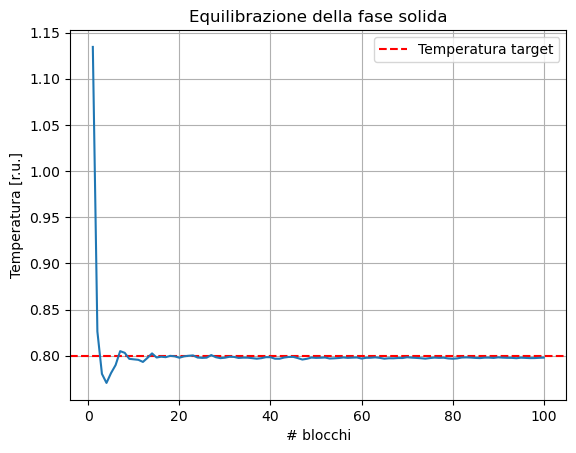

In [15]:
x, temp, error = np.loadtxt("risultati/Equil_solid/output_temp.dat", usecols=(0,2,3), unpack='true')
plt.title("Equilibrazione della fase solida")
plt.axhline(y=0.8, color="r", ls="--", label='Temperatura target')
plt.plot(x,temp)
plt.xlabel('# blocchi')
plt.ylabel('Temperatura [r.u.]')
plt.grid(True)
plt.legend()
plt.show()

### Fase solida - simulazione
Una volta equilibrato, la temperatura effettiva del sistema è data dalle velocità e posizioni iniziali delle particelle registrate nella prima fase di equilibrazione. La simulazione è stata effettuata su $M=10^5$ step suddivisi in $N=100$ blocchi.

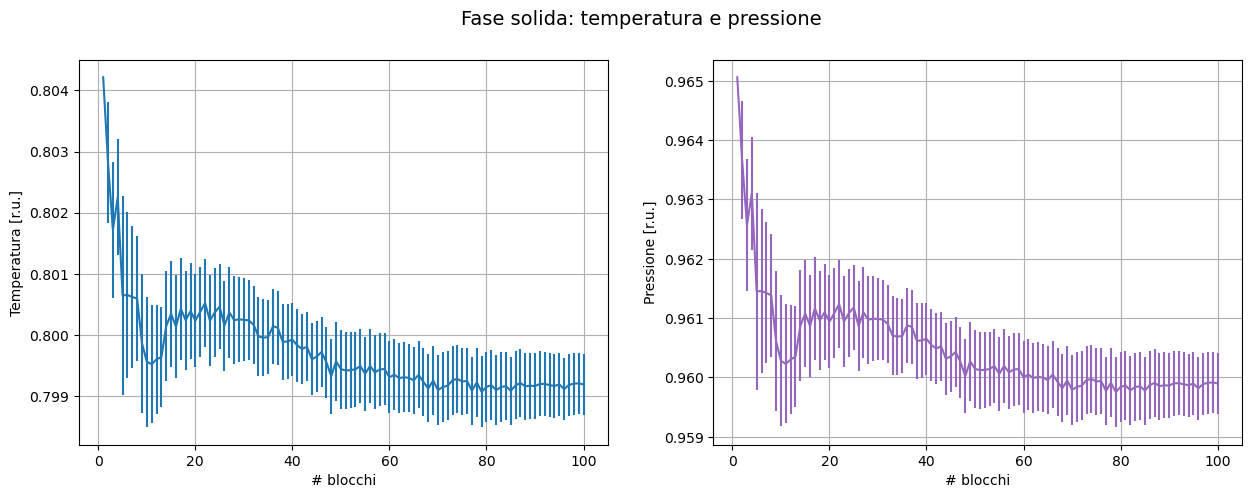

In [22]:
x, pres, error = np.loadtxt("risultati/Solid/output_pres.dat", usecols=(0,2,3), unpack='true')
x2, temp, error2 = np.loadtxt("risultati/Solid/output_temp.dat", usecols=(0,2,3), unpack='true')

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Fase solida: temperatura e pressione", size=14)

ax0.errorbar(x2,temp,yerr=error2)
ax0.set_xlabel('# blocchi')
ax0.set_ylabel("Temperatura [r.u.]")
ax0.grid(True)
#ax0.legend()

ax1.errorbar(x,pres,yerr=error, color='C4')
ax1.set_xlabel('# blocchi')
ax1.set_ylabel("Pressione [r.u.]")
ax1.grid(True)
#ax1.legend()

plt.show()

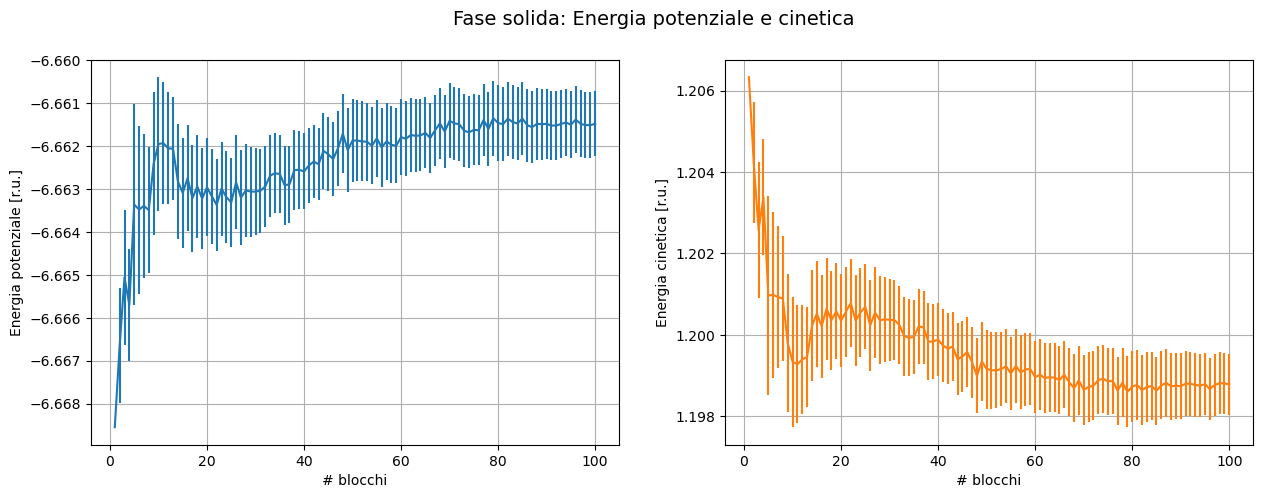

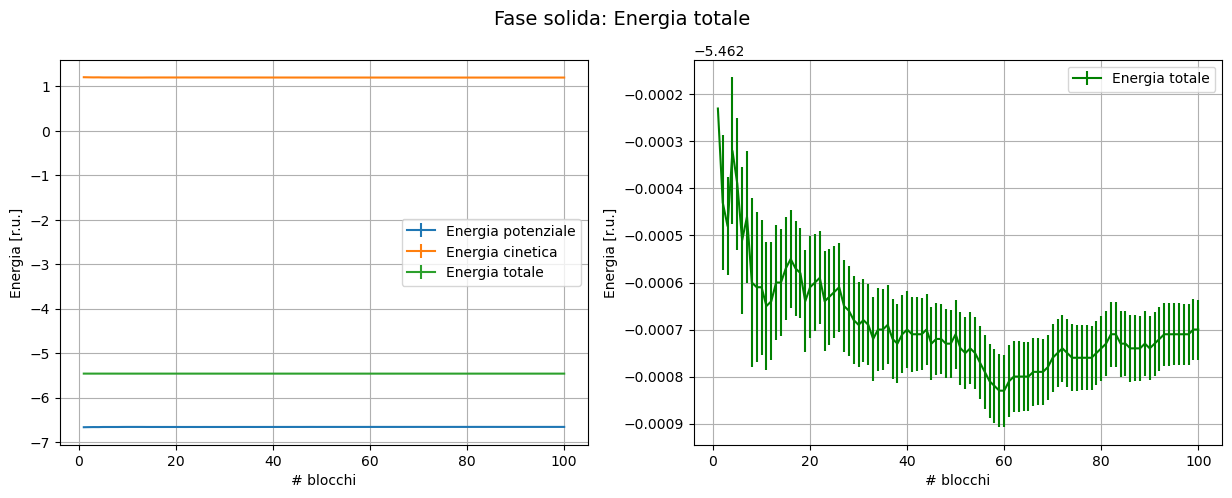

In [44]:
x, kin, error = np.loadtxt("risultati/Solid/output_ekin.dat", usecols=(0,2,3), unpack='true')
x2, pot, error2 = np.loadtxt("risultati/Solid/output_epot.dat", usecols=(0,2,3), unpack='true')
x3, tot, error3 = np.loadtxt("risultati/Solid/output_etot.dat", usecols=(0,2,3), unpack='true')

fig2, [ax3, ax2] = plt.subplots(1, 2, figsize=(15,5))

fig2.suptitle("Fase solida: Energia potenziale e cinetica", size=14)

ax2.errorbar(x,kin,yerr=error, label='Energia cinetica', color='tab:orange')
ax2.set_xlabel('# blocchi')
ax2.set_ylabel("Energia cinetica [r.u.]")
ax2.grid(True)

ax3.errorbar(x2,pot,yerr=error2, label='Energia potenziale')
ax3.set_xlabel('# blocchi')
ax3.set_ylabel("Energia potenziale [r.u.]")
ax3.grid(True)

plt.plot()

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Fase solida: Energia totale", size=14)

ax0.errorbar(x2,pot,yerr=error2, label='Energia potenziale')
ax0.errorbar(x,kin,yerr=error, label='Energia cinetica')
ax0.errorbar(x3,tot,yerr=error3, label='Energia totale')
ax0.set_xlabel('# blocchi')
ax0.set_ylabel("Energia [r.u.]")
ax0.grid(True)
ax0.legend()

ax1.errorbar(x3,tot,yerr=error3, color='g', label='Energia totale')
ax1.set_xlabel('# blocchi')
ax1.set_ylabel("Energia [r.u.]")
ax1.grid(True)
ax1.legend()

plt.show()

I grafici mostrano l'andamento di energia ...

### Fase liquida - equilibrazione
L'equilibrazione per la fase liquida è stata realizzata su $M=10^5$ step suddivisi in $N=100$ blocchi. La temperatura di partenza ottimale è stata trovata a $1.98$ r.u.

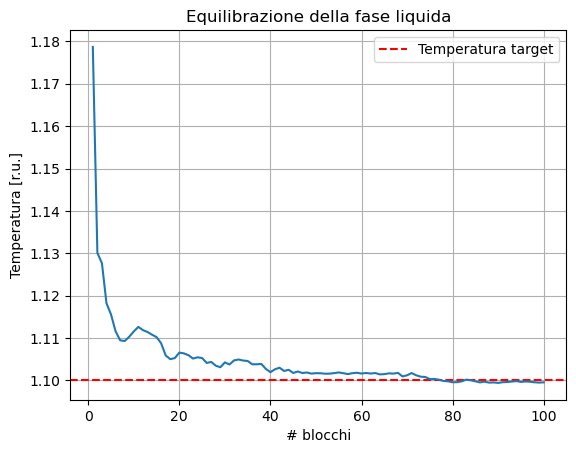

In [16]:
x, temp, error = np.loadtxt("risultati/Equil_liquid/output_temp.dat", usecols=(0,2,3), unpack='true')
plt.title("Equilibrazione della fase liquida")
plt.axhline(y=1.1, color="r", ls="--", label='Temperatura target')
plt.plot(x,temp)
plt.xlabel('# blocchi')
plt.ylabel('Temperatura [r.u.]')
plt.grid(True)
plt.legend()
plt.show()

### Fase liquida - simulazione

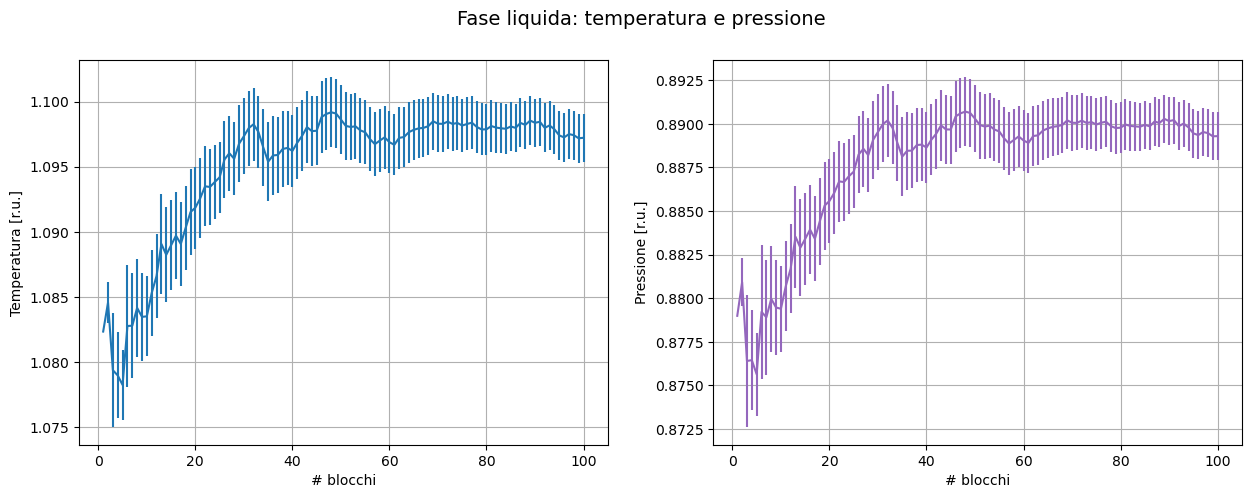

In [38]:
x, pres, error = np.loadtxt("risultati/Liquid/output_pres.dat", usecols=(0,2,3), unpack='true')
x2, temp, error2 = np.loadtxt("risultati/Liquid/output_temp.dat", usecols=(0,2,3), unpack='true')

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Fase liquida: temperatura e pressione", size=14)

ax0.errorbar(x2,temp,yerr=error2)
ax0.set_xlabel('# blocchi')
ax0.set_ylabel("Temperatura [r.u.]")
ax0.grid(True)
#ax0.legend()

ax1.errorbar(x,pres,yerr=error, color='C4')
ax1.set_xlabel('# blocchi')
ax1.set_ylabel("Pressione [r.u.]")
ax1.grid(True)
#ax1.legend()

plt.show()

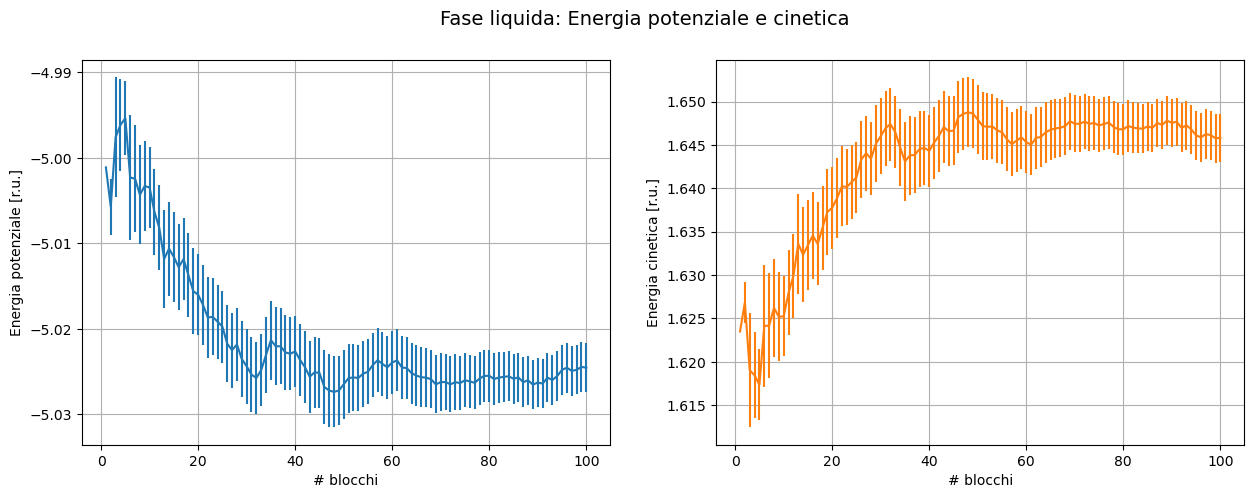

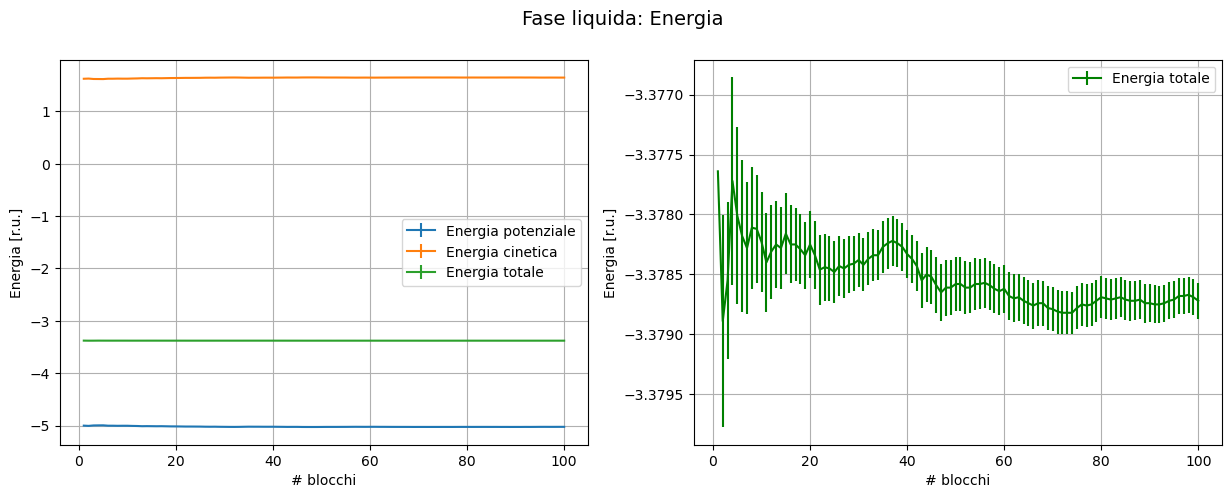

In [46]:
x, kin, error = np.loadtxt("risultati/Liquid/output_ekin.dat", usecols=(0,2,3), unpack='true')
x2, pot, error2 = np.loadtxt("risultati/Liquid/output_epot.dat", usecols=(0,2,3), unpack='true')
x3, tot, error3 = np.loadtxt("risultati/Liquid/output_etot.dat", usecols=(0,2,3), unpack='true')

fig2, [ax3, ax2] = plt.subplots(1, 2, figsize=(15,5))

fig2.suptitle("Fase liquida: Energia potenziale e cinetica", size=14)

ax2.errorbar(x,kin,yerr=error, color = "tab:orange", label='Energia cinetica')
ax2.set_xlabel('# blocchi')
ax2.set_ylabel("Energia cinetica [r.u.]")
ax2.grid(True)

ax3.errorbar(x2,pot,yerr=error2, label='Energia potenziale')
ax3.set_xlabel('# blocchi')
ax3.set_ylabel("Energia potenziale [r.u.]")
ax3.grid(True)

plt.plot()

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Fase liquida: Energia", size=14)

ax0.errorbar(x2,pot,yerr=error2, label='Energia potenziale')
ax0.errorbar(x,kin,yerr=error, label='Energia cinetica')
ax0.errorbar(x3,tot,yerr=error3, label='Energia totale')
ax0.set_xlabel('# blocchi')
ax0.set_ylabel("Energia [r.u.]")
ax0.grid(True)
ax0.legend()

ax1.errorbar(x3,tot,yerr=error3, color='g', label='Energia totale')
ax1.set_xlabel('# blocchi')
ax1.set_ylabel("Energia [r.u.]")
ax1.grid(True)
ax1.legend()

plt.show()

### Fase gassosa - equilibrazione
L'equilibrazione per la fase gassosa è stata realizzata su $M=10^5$ step suddivisi in $N=100$ blocchi. La temperatura di partenza ottimale è stata trovata a $0.96$ r.u., anche se il sistema equilibrato non raggiunge correttamente il valore di temperatura target.

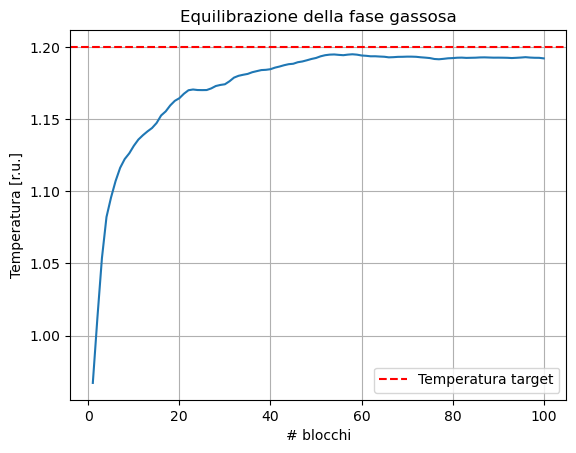

In [17]:
x, temp, error = np.loadtxt("risultati/Equil_gas/output_temp.dat", usecols=(0,2,3), unpack='true')
plt.title("Equilibrazione della fase gassosa")
plt.axhline(y=1.2, color="r", ls="--", label='Temperatura target')
plt.plot(x,temp)
plt.xlabel('# blocchi')
plt.ylabel('Temperatura [r.u.]')
plt.grid(True)
plt.legend()
plt.show()

### Fase gassosa - simulazione

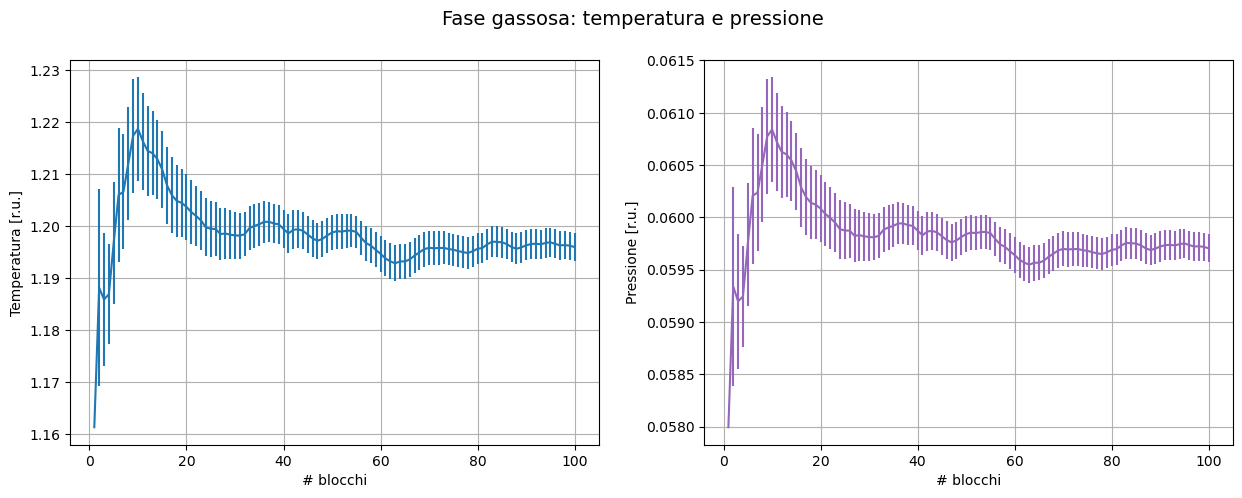

In [32]:
x, pres, error = np.loadtxt("risultati/Gas/output_pres.dat", usecols=(0,2,3), unpack='true')
x2, temp, error2 = np.loadtxt("risultati/Gas/output_temp.dat", usecols=(0,2,3), unpack='true')

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Fase gassosa: temperatura e pressione", size=14)

ax0.errorbar(x2,temp,yerr=error2)
ax0.set_xlabel('# blocchi')
ax0.set_ylabel("Temperatura [r.u.]")
ax0.grid(True)
#ax0.legend()

ax1.errorbar(x,pres,yerr=error, color='C4')
ax1.set_xlabel('# blocchi')
ax1.set_ylabel("Pressione [r.u.]")
ax1.grid(True)
#ax1.legend()

plt.show()

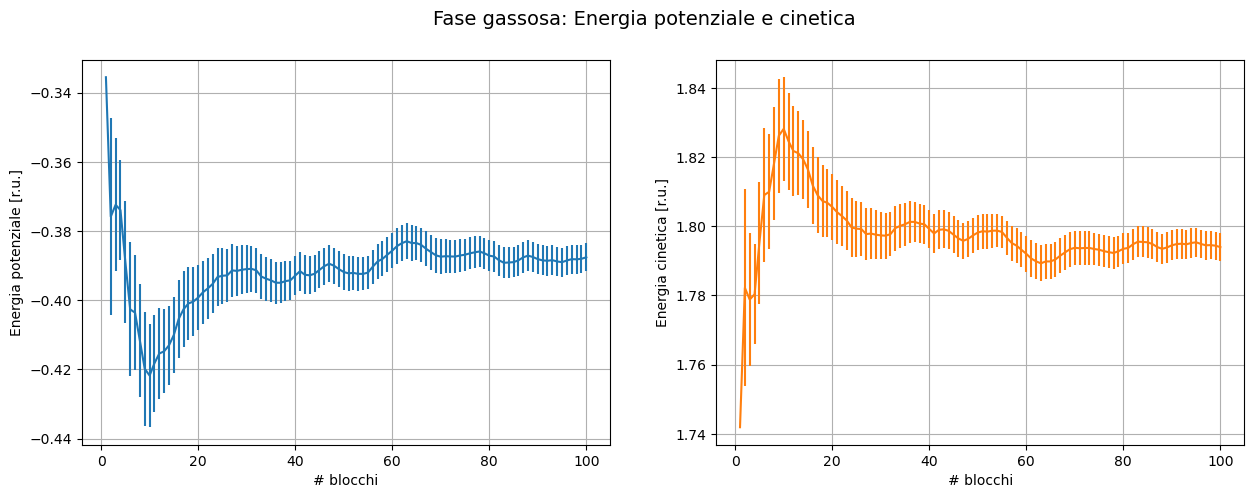

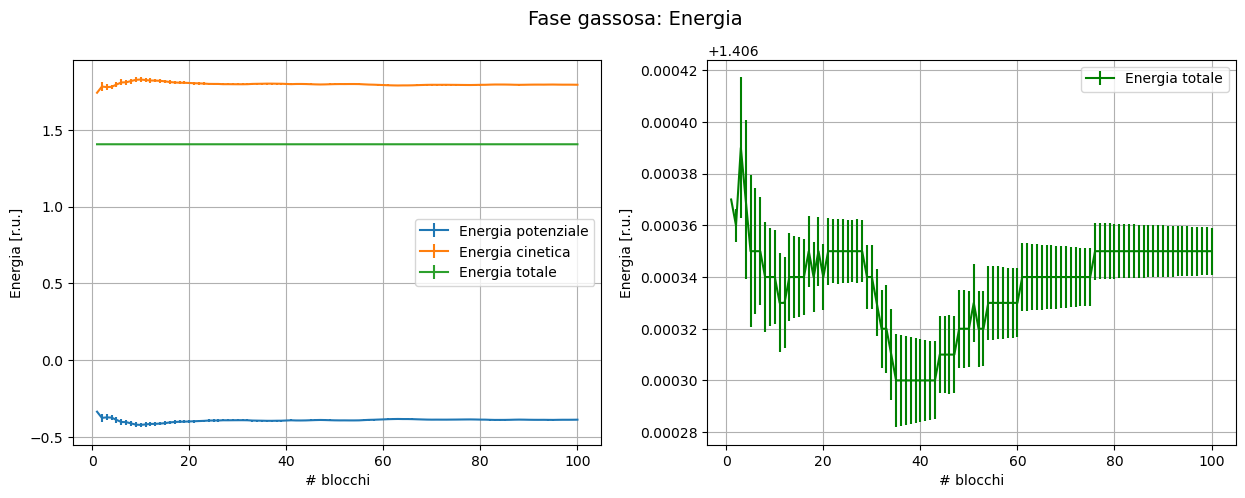

In [48]:
x, kin, error = np.loadtxt("risultati/Gas/output_ekin.dat", usecols=(0,2,3), unpack='true')
x2, pot, error2 = np.loadtxt("risultati/Gas/output_epot.dat", usecols=(0,2,3), unpack='true')
x3, tot, error3 = np.loadtxt("risultati/Gas/output_etot.dat", usecols=(0,2,3), unpack='true')

fig2, [ax3, ax2] = plt.subplots(1, 2, figsize=(15,5))

fig2.suptitle("Fase gassosa: Energia potenziale e cinetica", size=14)

ax2.errorbar(x,kin,yerr=error, color = "tab:orange", label='Energia cinetica')
ax2.set_xlabel('# blocchi')
ax2.set_ylabel("Energia cinetica [r.u.]")
ax2.grid(True)

ax3.errorbar(x2,pot,yerr=error2, label='Energia potenziale')
ax3.set_xlabel('# blocchi')
ax3.set_ylabel("Energia potenziale [r.u.]")
ax3.grid(True)

plt.plot()


fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Fase gassosa: Energia", size=14)

ax0.errorbar(x2,pot,yerr=error2, label='Energia potenziale')
ax0.errorbar(x,kin,yerr=error, label='Energia cinetica')
ax0.errorbar(x3,tot,yerr=error3, label='Energia totale')
ax0.set_xlabel('# blocchi')
ax0.set_ylabel("Energia [r.u.]")
ax0.grid(True)
ax0.legend()

ax1.errorbar(x3,tot,yerr=error3, color='g', label='Energia totale')
ax1.set_xlabel('# blocchi')
ax1.set_ylabel("Energia [r.u.]")
ax1.grid(True)
ax1.legend()

plt.show()